# Demonstration of SpaTrio on demo1 dataset

## Import SpaTrio

In [1]:
import spatrio
import pandas as pd

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-tyt9_n97 because the default path (/home/yph/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Read in input datasets

In [2]:
path = 'data/demo1/'

spot_ann = spatrio.load_data(path+"spatial_rna.csv" )
single_ann = spatrio.load_data( path+"multi_rna.csv" )
spot_meta =  pd.read_csv(path+"spatial_meta.csv", index_col=0)
spot_meta['type'] = spot_meta['type'].apply(lambda x: str(x))
single_meta =  pd.read_csv(path+"multi_meta.csv", index_col=0)
single_meta['type'] = single_meta['type'].apply(lambda x: str(x))
spot_meta[['sample']] = "spot"
single_meta[['sample']] = "single"
spot_ann.obs['type'] = spot_meta['type']
spot_ann.obs['type'] = spot_ann.obs['type'].astype(object)
single_ann.obs['type'] = single_meta['type']

pos = pd.read_csv(path+"pos.csv", index_col=0)
emb = pd.read_csv(path+"emb.csv", index_col=0)
spot_ann.obsm['spatial'] = pos
single_ann.obsm['reduction'] = emb

## Process input datasets

In [3]:
data1,data2 = spatrio.process_input(spot_ann,single_ann,marker_use = False,min_cells = 0)

## Align cells to spots using Optimal Transport

In [4]:
spatrio_decon = spatrio.ot_alignment(adata1 = data1, adata2 = data2, alpha = 0.1, aware_power = 2,
aware_spatial = True,aware_multi=True,use_gpu=False)
spatrio_decon

Calculating dissimilarity using euclidean distance on scaled data...
Constructing connectivity...
k = 10
aware_spatial = True
aware_multi = True
aware power = 2
Running OT...
alpha = 0.1
OT done!


,spot,cell,value
0,S1,09F_AACGAACCCCCC,0.001333
37550,S51,09F_CGTAGTGAGGAT,0.001333
38901,S52,09L_GTTCTACTGCAT,0.001333
38751,S52,09G_TCACCAATCTAG,0.001333
38601,S52,09D_CAATGCCTGACT,0.001333
...,...,...,...
38087,S138,09I_TGTTCCCAACTC,0.000000
38086,S137,09I_TGTTCCCAACTC,0.000000
38085,S136,09I_TGTTCCCAACTC,0.000000
38084,S135,09I_TGTTCCCAACTC,0.000000


## Assign coordinates to individual cells

In [5]:
spatrio_map = spatrio.assign_coord(adata1 = data1,adata2 = data2,out_data = spatrio_decon,random = False,top_num = 5)
# We provide the number of cell types in each spot in ref_counts.csv. This dataframe can be converted to the number of cells in each spot.
# ref_counts = pd.read_csv("ref_path/ref_counts.csv",index_col=0)
# expected_num = pd.DataFrame({'cell_num':ref_counts.sum(axis=1).tolist()},index = ref_counts.index.values)
# spatrio_map = spatrio.assign_coord(adata1 = data1,adata2 = data2,out_data = spatrio_decon,random = False,expected_num = expected_num)
spatrio_map

Assigning spatial coordinates to cells...
top_num = 5
random = False
There are 150 spots and 150 of them were assigned cells.
Assignment done!


,spot,cell,value,spot_type,cell_type,x,y,Cell_xcoord,Cell_ycoord
0,S1,09F_AACGAACCCCCC,0.001333,Cell type 1,Cell type 1,1.0,1.5,0.866943,1.331783
252,S1,09I_CAGCGGAGATTT,0.001333,Cell type 1,Cell type 1,1.0,1.5,0.791992,1.581034
253,S1,09D_CATTGCAATAAC,0.001333,Cell type 1,Cell type 1,1.0,1.5,1.006093,1.999963
254,S1,09F_AGTACTCACACA,0.001333,Cell type 1,Cell type 1,1.0,1.5,1.085799,1.293403
255,S1,09L_CCTGCCAATTGC,0.001333,Cell type 1,Cell type 1,1.0,1.5,1.249174,1.293818
...,...,...,...,...,...,...,...,...,...
199,S99,09I_TCGACGGTAGAG,0.001333,Cell type 2,Cell type 2,10.0,9.0,10.045944,8.786025
208,S99,09A_AGTCCGCGATTC,0.001333,Cell type 2,Cell type 2,10.0,9.0,9.762807,9.312683
232,S99,09I_GAGTGTCAATCA,0.001333,Cell type 2,Cell type 2,10.0,9.0,10.477509,8.851727
233,S99,09A_CGCGTAGGTGGA,0.001333,Cell type 2,Cell type 2,10.0,9.0,9.773653,9.160554


## Plot of input ST dataset

... storing 'type' as categorical


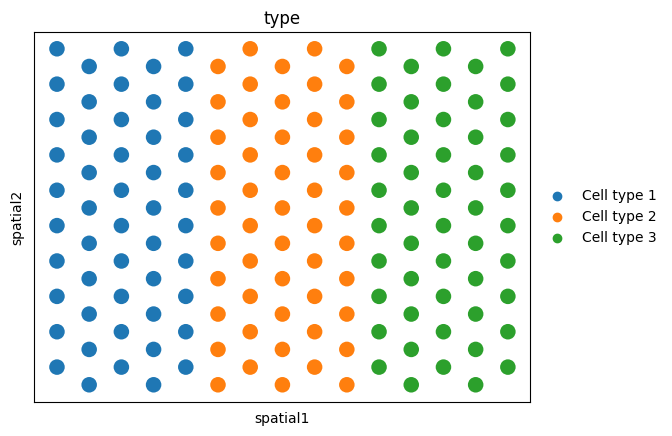

In [6]:
spatrio.spatial_plot(data1,info = pos ,color_by = 'type',mode = 1,size = 500)

## Plot of SpaTrio results

... storing 'type' as categorical


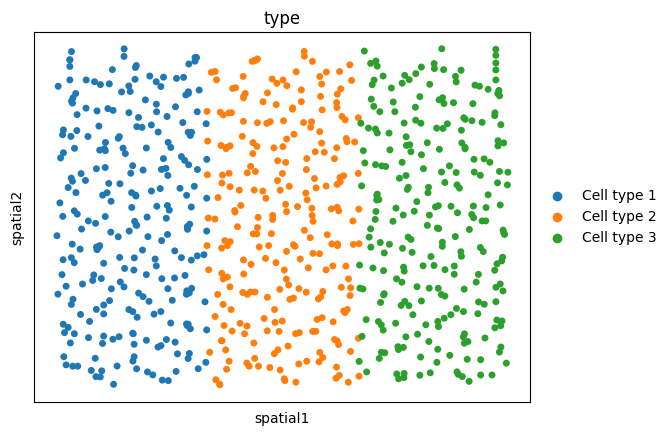

In [7]:
spatrio.spatial_plot(data2, spatrio_map, color_by = 'type',mode = 2,size = 100)